This is a notebook intended to automatically generate a Jupyter Notebook containing plots for detailed flag data 
in a given night's observations. In this notebook, plots are generated from both the flag files, and the flag_summary 
files, allowing us to compare them to ensure that flags are being generated correctly.

David Lewis 2018



In [20]:
#Init

import glob
from hera_qm import xrfi as xrfi
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm
import numpy as np
import numpy.ma as ma
import os
from pyuvdata import UVData
import sys

#Librarian init, to be added
# import hera_librarian
#
#
#
np.set_printoptions(threshold='nan')
Data_Path='/data6/HERA/data/2458042'
uv=UVData()
ant1=1
ant2=11

In [21]:
#First, get flag summaries and plot them:

#Summary variable init
first=True
file_flag_summary_xx=[]
file_flag_summary_yy=[]
file_flags=[]
sum_chan_mean_xx=[]
sum_chan_mean_yy=[]
sum_flag_times_xx=[]
sum_flag_times_yy=[]
sum_time_mean_xx=[]
sum_time_mean_yy=[]
sum_flag_waterfall_xx=[]
sum_flag_waterfall_yy=[]

#Gather flag summaries
#start with xx
file_flag_summary_xx=glob.glob(Data_Path + '/*.xx.*.flag_summary.npz')
file_flag_summary_xx.sort()
#Continue with yy
file_flag_summary_yy=glob.glob(Data_Path + '/*.yy.*.flag_summary.npz')
file_flag_summary_yy.sort()

#load in all those flags
for i, sumfile in enumerate(file_flag_summary_xx):
    flag_sum_data=np.load(sumfile)
    sum_chan_mean_xx.extend(flag_sum_data['fmean'].squeeze())
    sum_flag_times_xx.extend(flag_sum_data['times'])
    sum_time_mean_xx.append(flag_sum_data['tmean'].squeeze())
    sum_waterfallarr=flag_sum_data['waterfall'].squeeze(axis=2)
    sum_flag_waterfall_xx.extend(sum_waterfallarr)
for i, sumfile in enumerate(file_flag_summary_yy):
    flag_sum_data=np.load(sumfile)
    sum_chan_mean_yy.extend(flag_sum_data['fmean'].squeeze())
    sum_flag_times_yy.extend(flag_sum_data['times'])
    sum_time_mean_yy.append(flag_sum_data['tmean'].squeeze())
    sum_waterfallarr=flag_sum_data['waterfall'].squeeze(axis=2)
    sum_flag_waterfall_yy.extend(sum_waterfallarr)



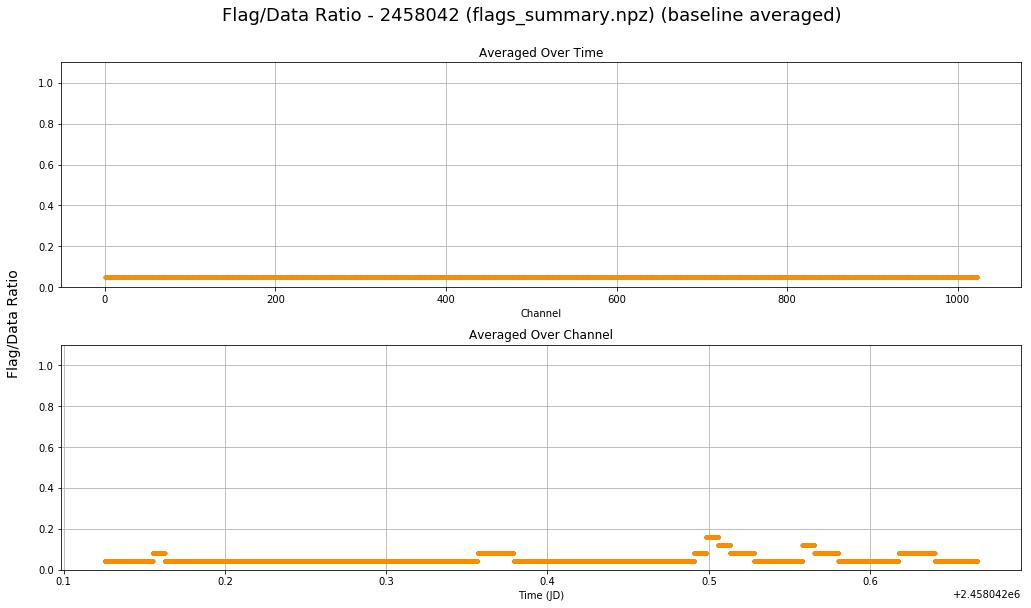

In [30]:
flagSumFreqAvg_xx=sum_chan_mean_xx
flagSumTimeAvg_xx=np.average(sum_time_mean_xx,axis=0)
flagSumFreqAvg_yy=sum_chan_mean_yy
flagSumTimeAvg_yy=np.average(sum_time_mean_yy,axis=0)

#Get ready to plot
fig, ax = plt.subplots(2, figsize=(14, 8))

plt.suptitle('Flag/Data Ratio - ' + os.path.split(Data_Path)[1]+' (flags_summary.npz) (baseline averaged)', y=1.05, fontsize=18)
#Generate time averaged plots:
ax[0].grid()
ax[0].set_title('Averaged Over Time')
ax[0].set_xlabel('Channel')
ax[0].set_ylim(0,1.1)
ax[0].plot(flagSumTimeAvg_xx, color='steelblue', marker='.', ls='')
ax[0].plot(flagSumTimeAvg_yy, color='darkorange', marker='.', ls='')
#Frequency averaged plots
ax[1].grid()
ax[1].set_title('Averaged Over Channel')
ax[1].set_xlabel('Time (JD)')
ax[1].set_ylim(0,1.1)
ax[1].plot(sum_flag_times_xx,flagSumFreqAvg_xx, color='steelblue', marker='.', ls='')
ax[1].plot(sum_flag_times_yy,flagSumFreqAvg_yy, color='darkorange', marker='.', ls='')

#ax[1].set_xticks(sum_flag_times_xx[::60])

fig.text(-.02, 0.5, 'Flag/Data Ratio', va='center', rotation='vertical', size='14')

plt.tight_layout()
plt.show()


In [13]:
file_flag_xx=[]
file_flag_yy=[]
time_mean_xx=[]
time_mean_yy=[]
flag_times_xx=[]
flag_times_yy=[]
chan_mean_xx=[]
chan_mean_yy=[]
flag_waterfall_xx=[]
flag_waterfall_yy=[]

#get flag files, extract info
file_flag_xx=glob.glob(Data_Path+'/*.xx.*.flags.npz')
file_flag_xx.sort()
file_flag_yy=glob.glob(Data_Path+'/*.yy.*.flags.npz')
file_flag_yy.sort()

for i,flagfile in enumerate(file_flag_xx):
    flag_data=np.load(flagfile)
    timelen=len(flag_data['waterfall'])
    time_mean_xx.append(np.mean(flag_data['flag_array'],axis=(0,1,3)))
    chan_mean_temp=np.mean(flag_data['flag_array'], axis=(1,2,3))
    numbaseline=len(chan_mean_temp)/timelen
    chantemp=np.reshape(chan_mean_temp,(timelen, numbaseline))
    chan_mean_xx.extend(np.mean(chantemp, axis=1))
    waterfalltempxx=np.reshape(flag_data['flag_array'], (timelen, numbaseline, 1,1024,1))
    flag_waterfall_xx.extend(np.average(waterfalltempxx, axis=1).squeeze())
    
for i,flagfile in enumerate(file_flag_yy):
    flag_data=np.load(flagfile)
    timelen=len(flag_data['waterfall'])
    time_mean_yy.append(np.mean(flag_data['flag_array'],axis=(0,1,3)))
    chan_mean_temp=np.mean(flag_data['flag_array'], axis=(1,2,3))
    numbaseline=len(chan_mean_temp)/timelen
    chantemp=np.reshape(chan_mean_temp,(timelen, numbaseline))
    chan_mean_yy.extend(np.mean(chantemp, axis=1))
    waterfalltempyy=np.reshape(flag_data['flag_array'], (timelen, numbaseline, 1,1024,1))
    flag_waterfall_yy.extend(np.average(waterfalltempyy, axis=1).squeeze())
    
time_mean_xx=np.mean(time_mean_xx, axis=0)
time_mean_yy=np.mean(time_mean_yy, axis=0)

Loading /data6/HERA/data/2458042/zen.2458042.12552.xx.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.13298.xx.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.14043.xx.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.14789.xx.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.15535.xx.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.16280.xx.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.17026.xx.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.17772.xx.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.18517.xx.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.19263.xx.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.20009.xx.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.20754.xx.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.21500.xx.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.22245.xx.HH.uvO.flags.npz
Loadin

Loading /data6/HERA/data/2458042/zen.2458042.44615.yy.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.45361.yy.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.46106.yy.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.46852.yy.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.47598.yy.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.48343.yy.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.49089.yy.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.49835.yy.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.50580.yy.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.51326.yy.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.52072.yy.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.52817.yy.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.53563.yy.HH.uvO.flags.npz
Loading /data6/HERA/data/2458042/zen.2458042.54309.yy.HH.uvO.flags.npz
Loadin

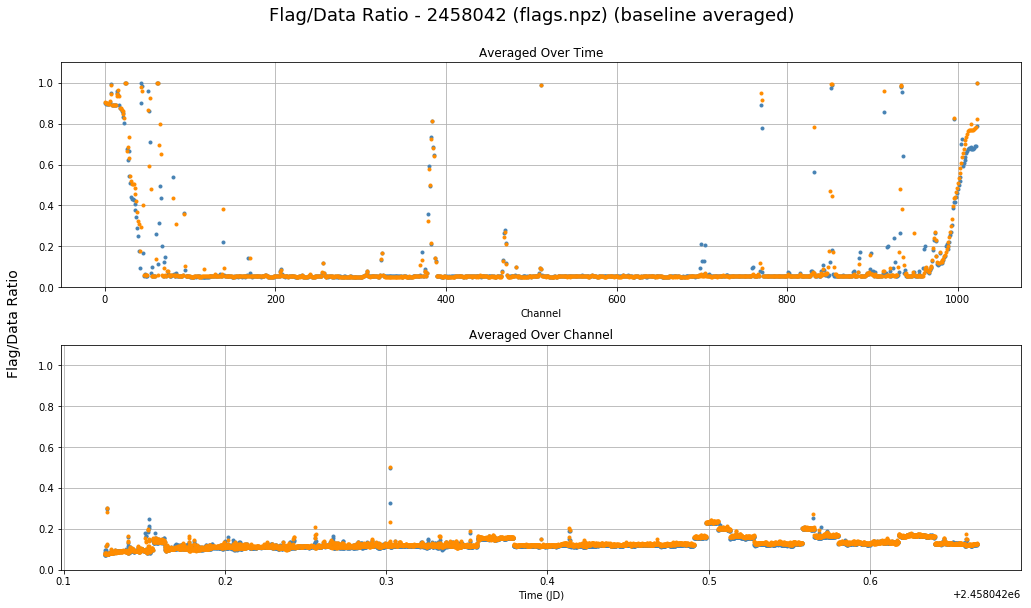

In [28]:
#Get ready to plot
fig, ax2 = plt.subplots(2, figsize=(14, 8))
plt.suptitle('Flag/Data Ratio - ' + os.path.split(Data_Path)[1]+' (flags.npz) (baseline averaged)', y=1.05, fontsize=18)
#Generate time averaged plots:
ax2[0].grid()
ax2[0].set_title('Averaged Over Time')
ax2[0].set_xlabel('Channel')
ax2[0].set_ylim(0,1.1)
ax2[0].plot(time_mean_xx, color='steelblue', marker='.', ls='')
ax2[0].plot(time_mean_yy, color='darkorange', marker='.', ls='')
#Frequency averaged plots
ax2[1].grid()
ax2[1].set_title('Averaged Over Channel')
ax2[1].set_xlabel('Time (JD)')
ax2[1].set_ylim(0,1.1)
ax2[1].plot(sum_flag_times_yy,chan_mean_xx, color='steelblue', marker='.', ls='')
ax2[1].plot(sum_flag_times_yy,chan_mean_yy, color='darkorange', marker='.', ls='')
#plt.xticks(np.arange(0,4353,60),file_times[::60])

fig.text(-.02, 0.5, 'Flag/Data Ratio', va='center', rotation='vertical', size='14')

plt.tight_layout()
plt.show()